# 문제제기

In [49]:
import warnings
warnings.filterwarnings('ignore')

## 1. '도박' 키워드
- 2019~2022 현재까지 '도박' 키워드 중 '청소년'이 차지하는 비율 비교

In [232]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df, keyword

def News(keyword, ex_keyword, num, start_date, end_date):
    global news_df, url,page_num
    
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    ex_keyword = urllib.parse.quote(ex_keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+ '+-' + ex_keyword + '&photo=3'+'&pd=3'+ '&ds='+start_date+'&de='+end_date+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

#검색키워드, 제외키워드, num, start_date, end_date 
# News('도박','양현석', 1000,'2019.01.01','2019.12.31')
# News('도박',' ', 1000,'2020.01.01','2020.12.31')
# News('도박','이재명', 1000,'2021.01.01','2021.12.31')
News('도박','공무원', 600,'2022.01.01','2022.07.29')

,title,url
0,"“100배 수익”… 개미들, 도박처럼 코인선물 베팅",https://www.donga.com/news/article/all/2022072...
1,"강원랜드 도박중독 회복자, 직접 재배한 감자 지역 나눔 '훈훈'",http://www.kado.net/news/articleView.html?idxn...
2,도박장 된 게임 불법 사설서버... 리니지·바람의나라 등 다양,http://www.fnnews.com/news/202207041804526633
3,100만원 넣고 30배 먹는다…주식판 깨지자 도박판 열렸다,http://www.edaily.co.kr/news/newspath.asp?news...
4,"""도박사이트 운영자 무관용 처벌… 중독 예방 교육 병행"" [범람하는 불법도박...",http://www.fnnews.com/news/202206301803336103
...,...,...
595,경찰 “성남FC사건 檢 요청 부분 다시 살필 것”,http://www.segye.com/content/html/2022/03/14/2...
596,"“사생활, 개인일탈” 잇단 총기사고…경찰 멘털 관리 절실",http://www.edaily.co.kr/news/newspath.asp?news...
597,"“정민용, 이재명 시장 비서실에 대장동 보고서 여러 차례 전달”",http://www.segye.com/content/html/2022/03/14/2...
598,[줌인 예수를 플렉스하다] <1> MZ세대 4인 ‘줌인톡톡’ 삶과 신앙을 이야기하...,http://news.kmib.co.kr/article/view.asp?arcid=...


In [233]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [234]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
# stop_word = ['도박','불법','범죄']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        # if word not in stop_word:
        noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

#2019
# data19 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data19)

#2020
# data20 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data20)

# 2021
# data21 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data21)

#2022
data22 =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data22)

df=pd.DataFrame(series, columns=['cnt'])

#청소년 키워드
# student_2019 =df.loc['청소년']
# student_2019

# student_2020 =df.loc['청소년']
# student_2020

# student_2021 =df.loc['청소년']
# student_2021

student_2022 =df.loc['청소년']
student_2022


cnt    10
Name: 청소년, dtype: int64

## 2019

In [ ]:
data19.pop('도박')
data19.pop('불법')
data19.pop('질병')

48

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data19)
plt.imshow(wordcloud)
plt.axis('off')

NameError: name 'data19' is not defined

## 2020

In [45]:
data20.pop('도박')
data20.pop('불법')
data20.pop('만원')
data20.pop('단독')

(-0.5, 1499.5, 999.5, -0.5)

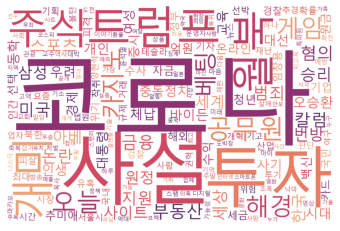

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data20)
plt.imshow(wordcloud)
plt.axis('off')

## 2021

In [75]:
data21.pop('도박')
data21.pop('불법')
# data21.pop('만원')

41

(-0.5, 1499.5, 999.5, -0.5)

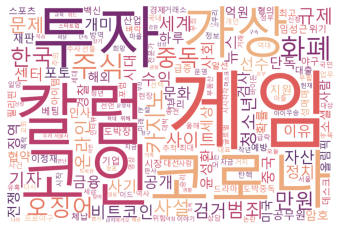

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data21)
plt.imshow(wordcloud)
plt.axis('off')

## 2022

In [65]:
url

'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%8F%84%EB%B0%95+-%20&photo=3&pd=3&ds=2022.01.01&de=2022.07.29&start=941'

In [69]:
data22.pop('도박')
data22.pop('불법')
# data21.pop('만원')

19

(-0.5, 1499.5, 999.5, -0.5)

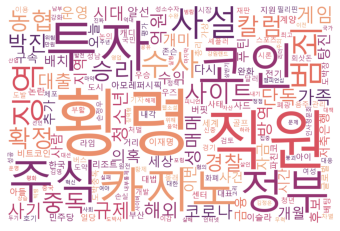

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data22)
plt.imshow(wordcloud)
plt.axis('off')

## 2019-2022 '도박' 중 '청소년' cnt

In [247]:
student_cnt =pd.DataFrame(columns=['cnt'])
student_cnt

,cnt


In [250]:
student_cnt.loc[0,'cnt'] = student_2019
student_cnt.loc[1,'cnt'] = student_2020
student_cnt.loc[2,'cnt'] = student_2021
student_cnt.loc[3,'cnt']  = student_2022
student_cnt

ValueError: Incompatible indexer with Series

In [237]:
student_cnt = pd.concat(['student_2019','student_2020','student_2021','student_2022'])
student_cnt

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

## 2. '청소년 불법' 키워드
- 2019~2022 현재까지 '청소년 ' 키워드 중 '도박'이 차지하는 비율 비교

In [232]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df, keyword

def News(keyword, ex_keyword, num, start_date, end_date):
    global news_df, url,page_num
    
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    ex_keyword = urllib.parse.quote(ex_keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+ '+-' + ex_keyword + '&photo=3'+'&pd=3'+ '&ds='+start_date+'&de='+end_date+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

#검색키워드, 제외키워드, num, start_date, end_date 
# News('도박','양현석', 1000,'2019.01.01','2019.12.31')
# News('도박',' ', 1000,'2020.01.01','2020.12.31')
# News('도박','이재명', 1000,'2021.01.01','2021.12.31')
News('도박','공무원', 600,'2022.01.01','2022.07.29')

,title,url
0,"“100배 수익”… 개미들, 도박처럼 코인선물 베팅",https://www.donga.com/news/article/all/2022072...
1,"강원랜드 도박중독 회복자, 직접 재배한 감자 지역 나눔 '훈훈'",http://www.kado.net/news/articleView.html?idxn...
2,도박장 된 게임 불법 사설서버... 리니지·바람의나라 등 다양,http://www.fnnews.com/news/202207041804526633
3,100만원 넣고 30배 먹는다…주식판 깨지자 도박판 열렸다,http://www.edaily.co.kr/news/newspath.asp?news...
4,"""도박사이트 운영자 무관용 처벌… 중독 예방 교육 병행"" [범람하는 불법도박...",http://www.fnnews.com/news/202206301803336103
...,...,...
595,경찰 “성남FC사건 檢 요청 부분 다시 살필 것”,http://www.segye.com/content/html/2022/03/14/2...
596,"“사생활, 개인일탈” 잇단 총기사고…경찰 멘털 관리 절실",http://www.edaily.co.kr/news/newspath.asp?news...
597,"“정민용, 이재명 시장 비서실에 대장동 보고서 여러 차례 전달”",http://www.segye.com/content/html/2022/03/14/2...
598,[줌인 예수를 플렉스하다] <1> MZ세대 4인 ‘줌인톡톡’ 삶과 신앙을 이야기하...,http://news.kmib.co.kr/article/view.asp?arcid=...


In [233]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [234]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
# stop_word = ['도박','불법','범죄']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        # if word not in stop_word:
        noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

#2019
# data19 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data19)

#2020
# data20 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data20)

# 2021
# data21 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data21)

#2022
data22 =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data22)

df=pd.DataFrame(series, columns=['cnt'])

#청소년 키워드
# student_2019 =df.loc['청소년']
# student_2019

# student_2020 =df.loc['청소년']
# student_2020

# student_2021 =df.loc['청소년']
# student_2021

student_2022 =df.loc['청소년']
student_2022


cnt    10
Name: 청소년, dtype: int64

# 원인

## 1. '청소년 도박 원인' 키워드
- 청소년 도박에 영향을 미치는 요인들

In [13]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요 청소년 도박 원인
필요한 뉴스기사의 숫자를 입력해주세요 1000


,title,url
0,"청소년불법도박, 어떠한 경우에도 선처 불가능해",http://www.globalepic.co.kr/view.php?ud=202207...
1,'아이 어른 할 것 없이 베팅'…한탕주의 도박 늪에 빠진 충북,https://www.news1.kr/articles/?4742532
2,"소년범죄, 원인부터 살피고 대책 논의를",https://www.hani.co.kr/arti/opinion/because/10...
3,"""처벌보다는 예방…사회적 안전망 구축해야""[범람하는 불법도박(下)]",http://www.fnnews.com/news/202206301359007765
4,[공공돋보기] 학교폭력 도화선 '청소년 도박 중독',http://www.00news.co.kr/news/articleView.html?...
...,...,...
995,[충청브리핑] 바른정당 의원 14명 ‘洪 지지’ 탈당 결의,http://www.newdaily.co.kr/news/article.html?no...
996,"[취재] 아이와 부모의 게임 소통? ""함께 공감하고 대화해요""",http://www.inven.co.kr/webzine/news/?news=192577
997,"시중銀, 가상화폐거래소에 가상계좌 380만개 남발",http://decenter.sedaily.com/NewsView/1RUH6DWV01
998,아이와 스마트폰 신경전 끝내는 법,http://www.sisain.co.kr/?mod=news&act=articleV...


In [14]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [31]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_words = ['도박', '예방', '불법', '문제', '청소년','원인','중독','교육','도박중독','범죄','센터','한국','질병','게임중독','장애','코드','규제','사회','산업','아이','업계','치료','몰입','도입','뉴스','논란','이유','학생','대책','문화','이용','관리','증상','이슈','성인','칼럼','기획','교육청','위험','심각','상담','복지','급증',]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_words:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기
data =dict(count.most_common(10)) #빈도수 정리 내림차(15위까지만)
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])


- wordcloud

(-0.5, 1499.5, 999.5, -0.5)

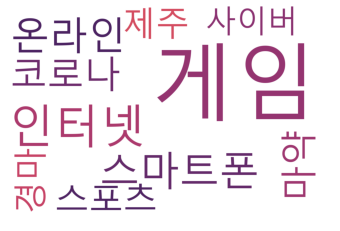

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

### 정리
- 게임, 스포츠, 경마 : 청소년 도박은 게임형태로 제공됨
- 코로나, 스마트폰, 인터넷 : 코로나 19 이후, 스마트폰과 인터넷 사용이 과다해지고 도박 광고에 노출됨
- 제주 : 제주도의 청소년 도박은 가장 심각한 수준

# 청소년 상담 실태

## 1. 지식인 '청소년 도박' > 도움의 필요성
- description의 verb추출

In [133]:
import pandas as pd
data_df = pd.DataFrame(columns=['title', 'description'])

In [134]:
data_df

,title,description


In [155]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "LIJD8mAPbkTMJZsQSK0k"
client_secret = "lfFpbSRs5V"

# query = urllib.parse.quote(input('검색 질의'))
query = urllib.parse.quote('청소년 도박')

# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(1)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(101)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(201)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(301)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(401)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(501)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(601)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(701)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(801)
url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(901)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_body=response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [156]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(response_body, 'html.parser')

titles = bs.find_all('title')
texts = bs.find_all('description')
display = bs.find('display')
# texts = bs.find_all('description')

# i=0
for title in titles:
    data_df.loc[i,'title'] =title.get_text()
    data_df.loc[i,'title'] = re.sub('[^가-힣]',' ',data_df.loc[i,'title'])
    i+= 1

# j=0
for text in texts:
    data_df.loc[j,'description'] =text.get_text()
    data_df.loc[j,'description'] = re.sub('[^가-힣]',' ',data_df.loc[j,'description'])
    j+= 1

data_df

,title,description
0,청소년 도박,
1,청소년 도박 문제점 알려주세요 급해요,내일 국어에서 발표하기를 하는데요 청소년 도박 문제점 좀 알려주세요 ...
2,청소년 도박 처벌,부터 도박 했고요 넣다 뺏다 천만원 정도 한것같은데 경찰에 걸리면...
3,청소년 도박 중독,원래 도박 같은건 한번도 하지 않았는데 주변 친구들로 진짜...
4,청소년 도박 빚,이제 고 인데 도박 을 하다 친구들에게 거짓말을 쳐서 돈을 빌리고 하다 ...
...,...,...
1005,온라인으로 돈버는 방법,불법 도박 말고요 안녕하세요 청소년 근로보호센...
1006,아들이 던파에빠져 만원을 도와주세요,아니죠 이긴사람이 가져가죠 그겁니다 아드님은 도박 에 실패한겁니다...
1007,제가 스크린골프장에서 알바를 했었는데요 제가,도박 으로 게임치러 오는사람이 많아요 하루에 만원 쓰는 사...
1008,아는 지인이 중고사기로 곧 재판을 봅니다,또한 그 돈을 불법 도박 사이트에서 사용하였습니다 그리하여 이 사...


In [211]:
import re
target =data_df['description'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [164]:
text1 = text

In [207]:
import pandas as pd
stopword = pd.read_csv('stopword_korean.csv', header=None)
stopword=stopword.values.tolist()
stop_word=[]
for i in range(len(stopword)):
    stop_word += stopword[i]
stop_word

['입니다', '있습니다']

In [209]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

verb_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if (tag=='noun') | (tag=='verb') |(tag=='Adjective'):
        if word not in stop_word:
            verb_list.append(word)

count = Counter(verb_list) #단어별 숫자세주기
data =dict(count.most_common()) #빈도수 정리 내림차(15위까지만)
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

In [210]:
data

{'있는': 97,
 '안녕하세요': 82,
 '같은': 71,
 '어떻게': 64,
 '있고': 38,
 '아니라': 31,
 '어떤': 28,
 '있어': 27,
 '없습니다': 27,
 '많은': 26,
 '같습니다': 21,
 '그런': 21,
 '이런': 21,
 '없는': 20,
 '있나요': 19,
 '있으므로': 18,
 '있는지': 18,
 '가능한': 18,
 '같은데': 16,
 '아니면': 15,
 '있어요': 15,
 '있다고': 15,
 '있는데': 15,
 '인해': 14,
 '있을까요': 14,
 '같아요': 12,
 '있을': 12,
 '어떠한': 12,
 '좋은': 12,
 '있다': 12,
 '많다': 12,
 '아니고': 11,
 '가능합니다': 11,
 '있으니': 11,
 '아니죠': 11,
 '없어서': 11,
 '아닌': 10,
 '안된다고': 10,
 '있다는': 10,
 '같아서': 10,
 '험악한': 10,
 '안되는': 9,
 '아닙니다': 9,
 '나쁜': 9,
 '힘든': 9,
 '불우한': 9,
 '높습니다': 9,
 '그럼': 9,
 '같': 9,
 '같은거는': 9,
 '없어요': 8,
 '인한': 8,
 '부탁드립니다': 8,
 '있으면': 8,
 '있기': 8,
 '엄격한': 8,
 '자세하게': 8,
 '없는데': 8,
 '가능한가요': 8,
 '의하여': 8,
 '솔직히': 7,
 '안됩니다': 7,
 '없고': 7,
 '같은거': 7,
 '있으며': 7,
 '미': 7,
 '같네요': 7,
 '없으면': 7,
 '있지만': 6,
 '힘듭니다': 6,
 '같아': 6,
 '많습니다': 6,
 '단순히': 6,
 '있어서': 6,
 '상당히': 6,
 '궁금합니다': 6,
 '나쁜건': 6,
 '가깝죠': 6,
 '가볍게': 6,
 '그러니': 6,
 '없음': 6,
 '의한': 6,
 '같은건': 5,
 '없나요': 5,
 '없지만': 5,
 '의해': 5,
 '없어': 5,
 '이러한': 5

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

# '청소년 도박 예방','청소년 도박 치료','청소년 도박 대책' 키워드 분석

In [256]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요 ㅇㄹㅇ
필요한 뉴스기사의 숫자를 입력해주세요 ㅇㄹ


ValueError: invalid literal for int() with base 10: 'ㅇㄹ'

In [252]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [266]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_words = ['도박', '청소년', '예방', '문제','한국','도박중독','실시','업무']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_words:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기
data =dict(count.most_common()) #빈도수 정리 내림차(15위까지만)
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])
df

,cnt
센터,451
관리,267
교육,223
협약,84
교육청,78
...,...
포항시,1
우선,1
입건,1
고양시,1


- wordcloud

(-0.5, 1499.5, 999.5, -0.5)

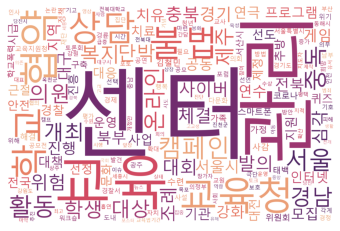

In [267]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')